<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 1: Pregunta 1 </H3>
<hr style="height:2px;border:none"/>

**Integrantes**  
* Eliana Providel - 692018101-3
* Rodrigo Hermosilla - 9574144-4

#### Librerias comunes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sys
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

 ><b>1.a Modulos y carga de datos</b>. <br/>Comenzaremos cargando las librerias relevantes para el resto de la tarea y cargando los datos a un _DataFrame_ para facilitar su manipulación. Explore los tipos de datos que hemos cargado, los valores que tienen estos datos y como se distribuyen.

In [2]:
data = pd.read_csv("BlackFriday.csv") #Carga los datos desde el archivo fuente.

>Cuente los valores N/A de cada columna con el siguiente código y explique brevemente porque en un primer momento preferiremos eliminar la segunda y tercera categoría del producto.<br/>Cuantos registros hay de mujeres y de hombres? Cuanto gastan en promedio los distintos rangos de edad? Entregue alguna otra medicion que le parezca interesante y permita familiarizarse con los datos.


Exploración de datos.

In [3]:
data.isna().sum() #Suma los registros nulos (sum(False))

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

**COMENTARIO:** Se observa que las columnas <i>Product_Category_2</i> y <i>Product_Category_3</i> contienen una gran cantidad de valores nulos, por lo cual se recomienda su eliminación.

In [4]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


Para determinar el contenido de cada columna, se uso la siguiente rutina.

In [6]:
for column in data.columns:
    print("Columna {}, :{}".format(column,np.unique(data[column].dropna())))

Columna User_ID, :[1000001 1000002 1000003 ... 1006038 1006039 1006040]
Columna Product_ID, :['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Columna Gender, :['F' 'M']
Columna Age, :['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Columna Occupation, :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Columna City_Category, :['A' 'B' 'C']
Columna Stay_In_Current_City_Years, :['0' '1' '2' '3' '4+']
Columna Marital_Status, :[0 1]
Columna Product_Category_1, :[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Columna Product_Category_2, :[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
Columna Product_Category_3, :[ 3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
Columna Purchase, :[  185   186   187 ... 23959 23960 23961]


Para contar el numero de datos en cada categoría usamos la siguiente rutina:

In [7]:
for col in data.columns:    
    if(col != 'User_ID'):
        print("************************************************")
        print("Datos agrupados por valor de columna: ",(data.groupby(col).User_ID.nunique()))

************************************************
Datos agrupados por valor de columna:  Product_ID
P00000142    1130
P00000242     371
P00000342     238
P00000442      92
P00000542     146
P00000642     512
P00000742     238
P00000842      36
P00000942      54
P00001042     494
P00001142     572
P00001242      99
P00001342      61
P00001442      83
P00001542      68
P00001642     349
P00001742     449
P00001842      76
P00001942     209
P00002042      91
P00002142     728
P00002242     195
P00002342      66
P00002442     325
P00002542     532
P00002642      62
P00002742      39
P00002842      83
P00002942     219
P00003042      37
             ... 
P0096942      153
P0097042       87
P0097142      482
P0097242      896
P0097342      358
P0097442        6
P0097542        3
P0097642        1
P0097742      249
P0097842      276
P0097942       62
P0098042       20
P0098142       42
P0098242      229
P0098342      251
P0098442       72
P0098542       45
P0098642       26
P0098742       46
P

Tambien observamos los distintos tipos de datos que contiene el set.

In [8]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Para visualizar la distribución de los datos se grafican los histogramas.

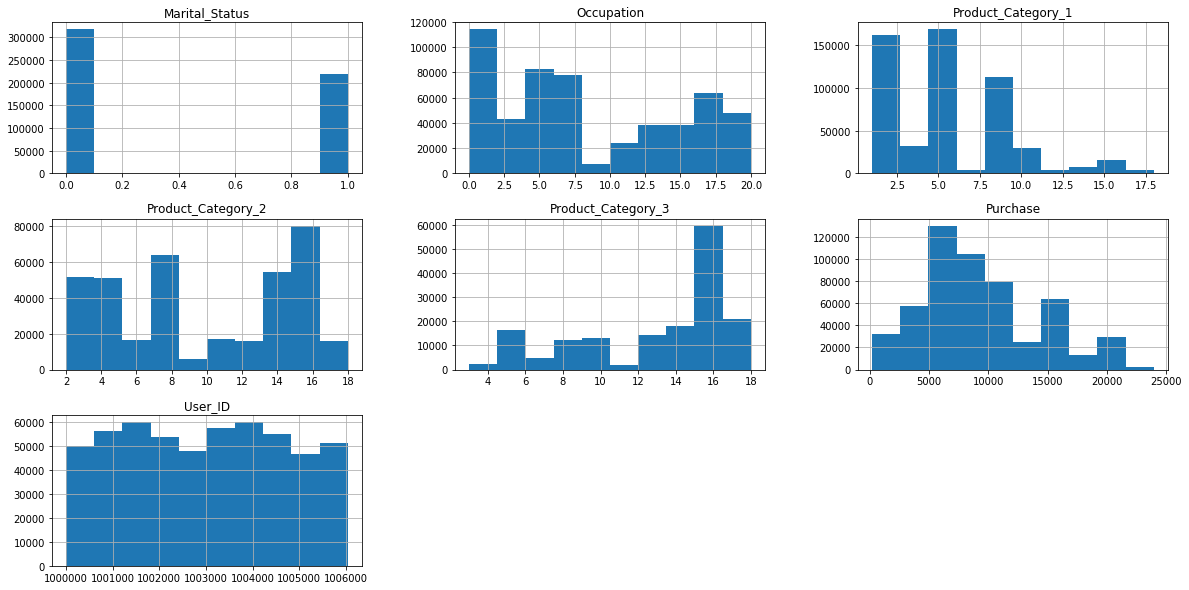

In [9]:
_=data.hist(figsize=(20,10))

Como se puede observar, no se muestran los datos categoricos, y en general tienen una distribución no uniforme a excepción de *Marital_status* que tiene dos categorias, *Purchase* y *User_ID*.

¿Cuantos hombres y mujeres hay en el set de datos?

In [10]:
data.groupby("Gender").User_ID.nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

¿Cuánto gasta cada rango de edad?

In [11]:
print("Total gastado: ", data.Purchase.sum())

Total gastado:  5017668378


In [12]:
data.groupby(['Age'])['Purchase'].sum() #Total gastado por rango de edad

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

Analizando otras combinaciones:

In [13]:
#Total gastado por rango de edad y genero
data.groupby(['Gender', 'Age'])['Purchase'].sum() 

Gender  Age  
F       0-17       41826615
        18-25     202209450
        26-35     433857680
        36-45     239010480
        46-50     114796993
        51-55      87972407
        55+        44950396
M       0-17       90832391
        18-25     699459830
        26-35    1565891426
        36-45     771639085
        46-50     298621230
        51-55     273935949
        55+       152664446
Name: Purchase, dtype: int64

### 1.b Columnas descartadas

>De los tipos de datos que tenemos cuales resultarán problematicos para realizar regresión lineal? Del dato "City_Category", cuantos valores distintos existen? (puede usar el metodo .unique por ejemplo)
Porqué a pesar de ser dato numerico las columnas "Product_Category" podrían comportarse mal con la regresión lineal?



El tipo de dato *Object* es problemático para poder usarlo en el modelo (los modelos requieren información numérica estandarizada), por lo cual se deben transformar a datos numéricos equivalentes (*int64*).

Los siguientes son los valores del campo *City_Category*.

In [14]:
print(np.unique(data['City_Category']))

['A' 'B' 'C']


De los tres distintos valores de *City_Category*, la siguiente instrucciones muestra cuantos hay de cada uno.

In [15]:
print(data.groupby('City_Category').User_ID.count())

City_Category
A    144638
B    226493
C    166446
Name: User_ID, dtype: int64


Dado que en *Product_Category* existen varios registros nulos, puede generar conflictos en el modelo, ya que finalmente podría estar aprendiendo del Nulo o 0 como una clasificación válida.

Como vimos en la exploración anterior, los datos mas problemáticos son Product_Category_2 y Product_Category_3, ademas de User_ID y Product_ID cuyos valores no son relevantes para el modelo, dado que para éste no es relevante aprender de estos datos (no son características).

In [16]:
data_ant=data #guardamos la data previa para futuros experimentos

In [17]:
data=data_ant

In [18]:
data = data.drop(columns=['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3'])

### 1.c Datos categoricos

>Transformaremos ahora los datos no numericos a datos numéricos. Para esto transformaremos el género a una variable binaria como muestra el código siguiente. Transforme todos los datos problematicos de manera similar. Discuta la eleccion realizada para "City_Category", más adelante haremos otra propuesta. Para los rangos de edad puede utilizar el promedio de ambos valores. Discuta si tiene alguna relevancia la elección del valor numerigo (_e.g._ 1 ó 0 para mujer) para el modelo de regresión lineal. Es así en todos los casos o solo para variables binarias?
 Por qué el dato "Occupation" no podemos utilizarlo directamente a pesar de ser numérico? Que solucion nos da el metodo `get_dummies` de pandas?

In [19]:
for column in data.columns:
    if data[column].dtypes==np.object:
        print("Columna {}, :{}".format(column,np.unique(data[column].dropna())))

Columna Gender, :['F' 'M']
Columna Age, :['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Columna City_Category, :['A' 'B' 'C']
Columna Stay_In_Current_City_Years, :['0' '1' '2' '3' '4+']


Para poder hacer las conversiones definimos primero el diccionario para cada categoría.

In [20]:
gender_dic = {'F':1, 'M':0}
city_cat_dic = {'A':-1, 'C':0, 'B':1}
age_dic = {'0-17':9, '18-25':21, '26-35':30, '36-45':40, '46-50':47, '51-55':52, '55+':70}
stay_dic = {'0':0,'1':1,'2':2, '3':3, '4+':4}

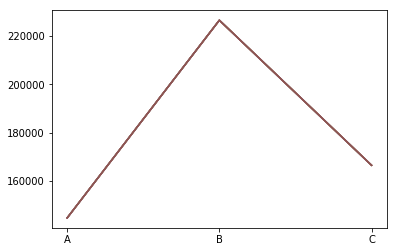

In [21]:
_=plt.plot(data.groupby('City_Category').count())

In [22]:
data['Gender'] = data.Gender.apply(lambda x: gender_dic[x])
data['City'] = data.City_Category.apply(lambda x: city_cat_dic[x])
data['Age'] = data.Age.apply(lambda x: age_dic[x])
data['Years_in_City'] = data.Stay_In_Current_City_Years.apply(lambda x: stay_dic[x])

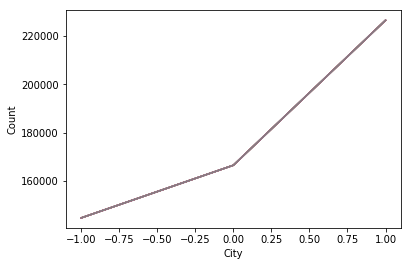

In [23]:
_=plt.plot(data.groupby('City').count())
_=plt.xlabel('City')
_=plt.ylabel('Count')

Se transformaron todos los datos a numéricos. Como se observa en la gráfica, para el caso del campo *City* los datos se reordenan de manera ascendente, con tal de hacer una relación del valor de la categoría con la cantidad de registros asociados a cada una, de tal forma que el modelo aprenda la existencia de ésta relación directamente proporcional.

In [24]:
data = data.drop(columns=['City_Category','Stay_In_Current_City_Years']) #Se eliminan las columnas originales

In [25]:
data.head()

,Gender,Age,Occupation,Marital_Status,Purchase,City,Years_in_City
0,1,9,10,0,8370,-1,2
1,1,9,10,0,15200,-1,2
2,1,9,10,0,1422,-1,2
3,1,9,10,0,1057,-1,2
4,0,70,16,0,7969,0,4


Respecto al género, se identifica que al convertirlas en 0 y 1, minimizamos el costo computacional, y es posible dejarlo como binario dado que existen solo dos categorías ('F' y 'M'). Sin embargo, esta lógica no es posible de aplicar a *Occupation* dado que existen mas de 2 valores posibles en la categoría, para lo cual es necesario una estructura del tipo *one hot vector*, para lo cual utilizamos el metodo `get_dummies` de *pandas*.

Despues de eliminar las columnas que no se usarán, y transformar las categorías del tipo *Object*, es posible graficar y visualizar el conjunto de categorías finales.

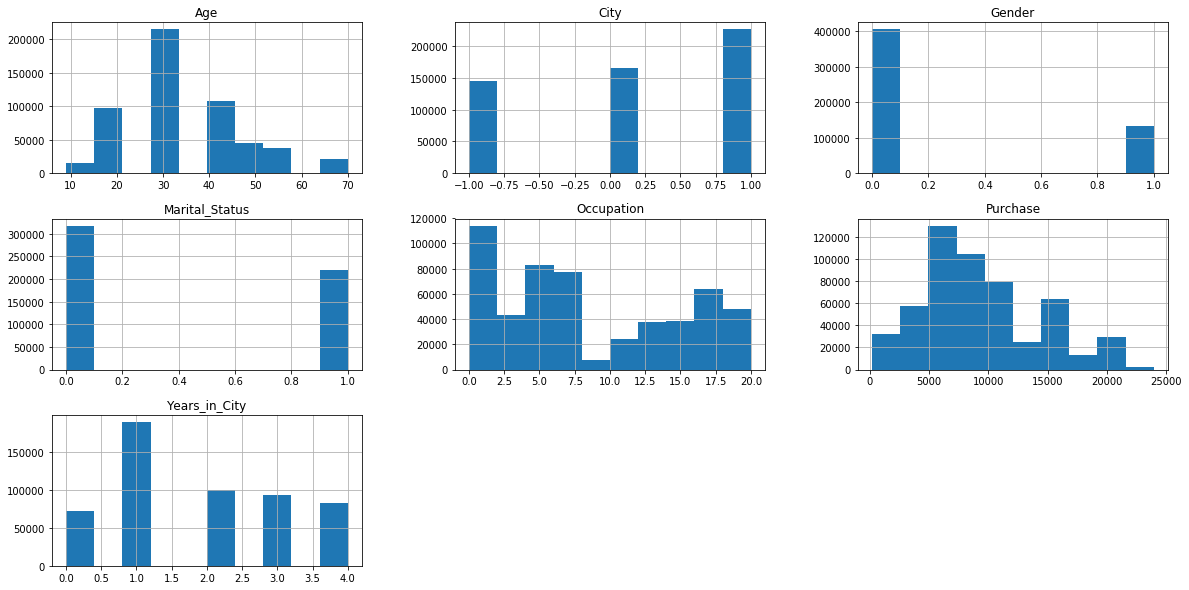

In [26]:
_=data.hist(figsize=(20,10))

La siguiente figura muestra claramente la relación y monto de compra para cada grupo etareo.

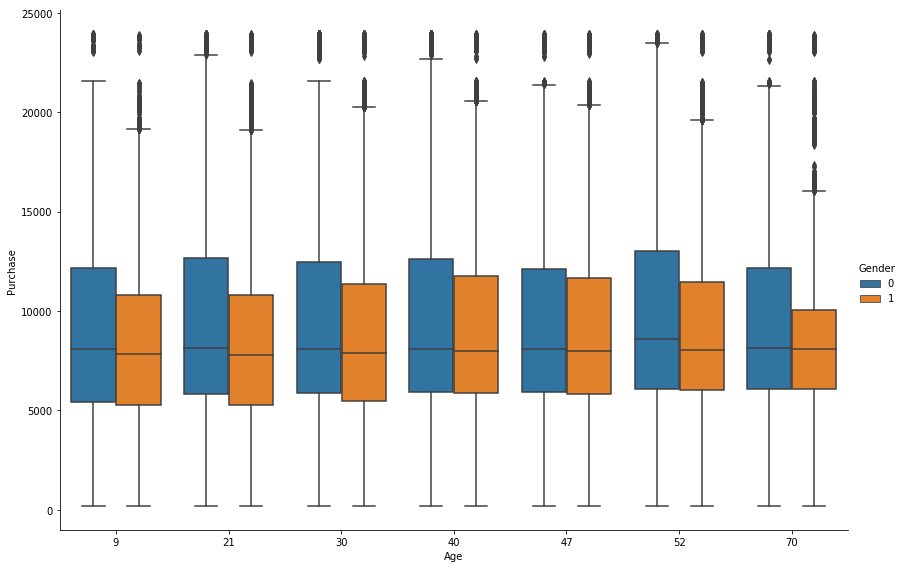

In [27]:
_=sns.catplot(kind='box',  
               y='Purchase',
               x='Age',     
               hue='Gender',
               data=data,   
               height=8,    
               aspect=1.5,  
               legend_out=True)

**CONCLUSION ESPERADA BUENA VARIANZA**

A continuación se realiza la conversión de la categoría agrupación a un conjunto de valores que representan cada una de las ocupaciones, a través de la función `get_dummies`.

In [28]:
data_pre = pd.get_dummies(data.Occupation, dtype=np.float64)
col = list(data.columns)

In [29]:
np.unique(data['Occupation']) #valores posibles de la categoría original

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [30]:
#vinculación de las nuevas columnas con la estructura original.
col.remove('Occupation')
data_pre[col] = data[col]
data_pre=data_pre.astype(np.float64) 

In [31]:
data_pre.head(10)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,Gender,Age,Marital_Status,Purchase,City,Years_in_City
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,0.0,8370.0,-1.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,0.0,15200.0,-1.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,0.0,1422.0,-1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,0.0,1057.0,-1.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,70.0,0.0,7969.0,0.0,4.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.0,0.0,15227.0,-1.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.0,1.0,19215.0,1.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.0,1.0,15854.0,1.0,2.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.0,1.0,15686.0,1.0,2.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,30.0,1.0,7871.0,-1.0,1.0


### 1.d Separación de datos

> Separaremos los datos en _train_, _validation_ y _test_ con 75%, 15% y 10% de los datos respectivamente. Verifique que se cumplen aproximadamente las proporciones. Luego separe el _target_ del resto de las variables que consideraremos

In [32]:
#separación de los datos de entrada de la variable target.
data_Xpre = data_pre.drop(columns='Purchase')
data_ypre = data_pre.Purchase

In [33]:
data_Xpre.head(10) #como queda la matriz sin la variable target

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,Gender,Age,Marital_Status,City,Years_in_City
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,-1.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,-1.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,-1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,-1.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,4.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,-1.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0,1.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0,1.0,2.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0,1.0,2.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,30.0,1.0,-1.0,1.0


In [34]:
data_ypre.head(10) #arreglo con la variable target

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
5    15227.0
6    19215.0
7    15854.0
8    15686.0
9     7871.0
Name: Purchase, dtype: float64

In [35]:
print("data_Xpre: ", data_Xpre.shape)
print("data_ypre: ", data_ypre.shape)

data_Xpre:  (537577, 26)
data_ypre:  (537577,)


|Subconjunto|Cantidad   |%|
|---|---|---|
|Total Original  |537.577   |100%|
|Entrenamiento   |403.182   |75%|
|Testing   |53.758   |10%|
|Validación   |80.637   |15%|

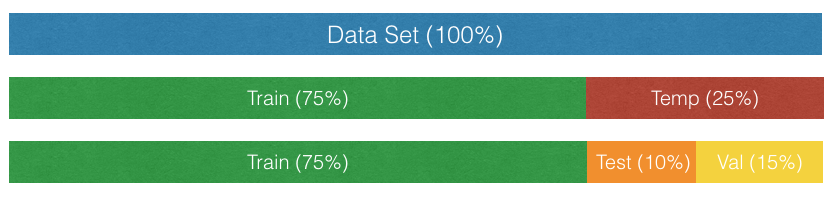

In [36]:
from IPython.display import Image
Image("data_split.png")

In [37]:
# Primero se separa el 75% como entrenamiento y queda un 25% disponible en data_temp
data_Xtrain, data_Xtemp, data_ytrain, data_ytemp = train_test_split(data_Xpre, data_ypre, test_size=0.25) 

#separa el 15% (25%*60%) como validación, y el 10% (25%*40%) con test. 
data_Xval, data_Xtest, data_yval, data_ytest = train_test_split(data_Xtemp,data_ytemp, test_size=0.4) 

In [38]:
print("X train:", data_Xtrain.shape)
print("Y train:", data_ytrain.shape)
print("X test: ", data_Xtest.shape)
print("Y test: ", data_ytest.shape)
print("X val:  ", data_Xval.shape)
print("Y val:  ", data_yval.shape)

X train: (403182, 26)
Y train: (403182,)
X test:  (53758, 26)
Y test:  (53758,)
X val:   (80637, 26)
Y val:   (80637,)


### 1.e Estandarización

>Utilizaremos `Standar_Scaler` para estandarizar los datos antes de entrenar. Que ventaja tiene en su opinion el tener un objeto que permite estandarizar (y hacer la transformación inversa) frente a hacer la opreación aritmetica "manualmente"? Note el cambio de tipo entre `data_x_train` y `x_train`. Tiene utilidad estandarizar el _target_ para este modelo? Guarde el _target_ estandarizado de todas formas para comparar más adelante.

In [39]:
scaler_x = StandardScaler()
scaler_x.fit(data_Xtrain)
x_tra = scaler_x.transform(data_Xtrain)
x_val = scaler_x.transform(data_Xval)
x_tst = scaler_x.transform(data_Xtest)

En las siguientes gráficas es posible ver los datos antes y despues de la estandarización. Donde es claro, que solo afecta la escala y no la distribución de los valores.

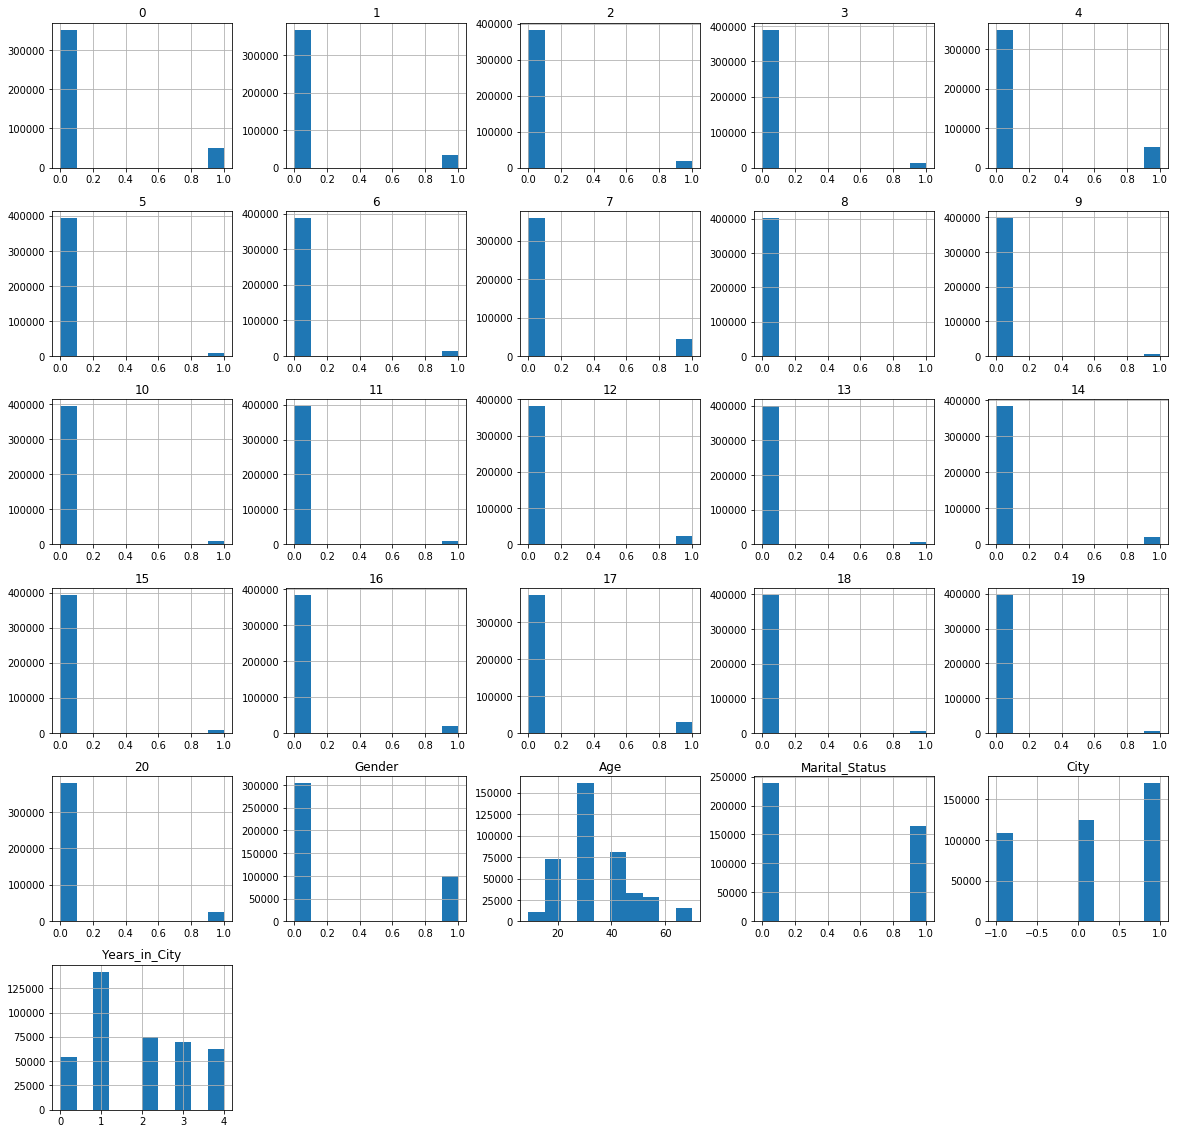

In [40]:
#Datos sin escalar
df_x_tra_pre=pd.DataFrame(data_Xtrain)
_=df_x_tra_pre.hist(figsize=(20,20))

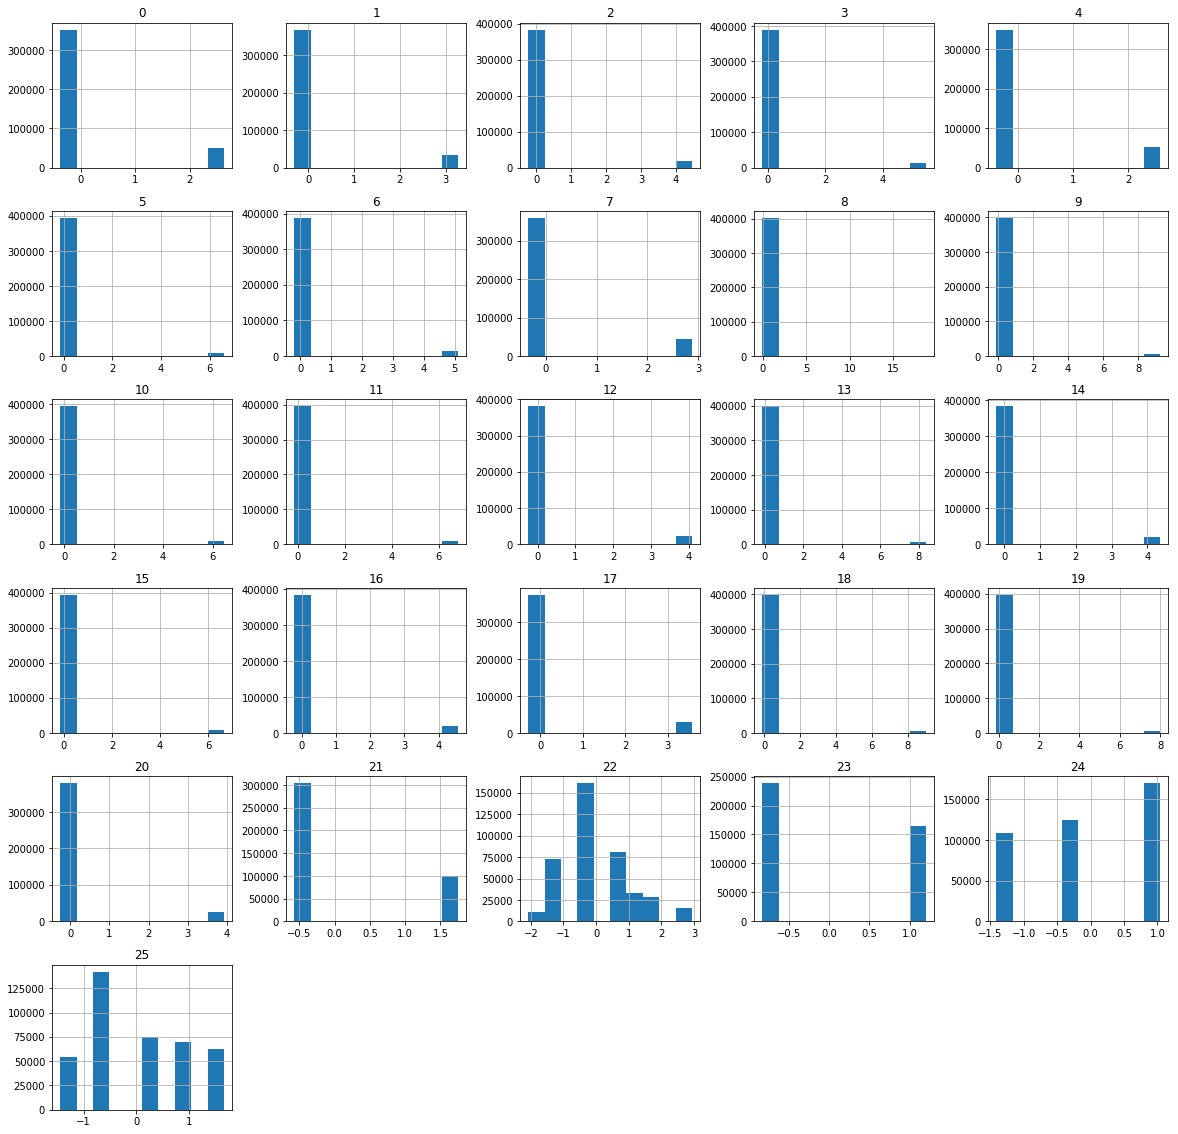

In [41]:
#Datos escalados
df_x_tra=pd.DataFrame(x_tra)
_=df_x_tra.hist(figsize=(20,20))

La principal ventaja de lograr una estandarización con una función es que no es requerido hacer los cálculos de búsqueda de los elementos para construir los valores de **z = (x-u) / s**, es decir, calcular cada una de las **medias u**  y las **desviaciones estandar s** para cada característica. El mismo caso para la des-estandarización.

In [42]:
scaler_y = StandardScaler()
scaler_y.fit(data_ytrain.values.reshape(-1,1))
y_tra = scaler_y.transform(data_ytrain.values.reshape(-1,1))
y_val = scaler_y.transform(data_yval.values.reshape(-1,1))
y_tst = scaler_y.transform(data_ytest.values.reshape(-1,1))

Escalar el target tiene sentido en la medida que eso aporte a la computación, sin embargo en terminos de la eficiencia del modelo, el estandarizar o no, no debería tener implicancias. Lo probaremos más adelante.

### 1.f Primera regresión

>Realice una regresión lineal con los datos escalados y no escalados. Compare sus _scores_. Cual es la formula del _score_ que utiliza el regresor (puede buscar en la documentación)? Qué interpretación se le puede dar al _score_? Puede concluir que los datos escalados o no escalados entregan un mejor modelo? Sobre que conjunto de datos (_train_, _test_ o _valitdation_) deberíamos comparar el _score_?

In [43]:
#Ejecutaremos la regresión lineal con y escalada
reg_scaler = LinearRegression()
reg_scaler.fit(x_tra, y_tra)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Utilizaremos el metodo `.score` para determinar el coeficiente **R²**, el que está definido como (1-u/v), donde u es la suma residual de los cuadrados **((y_true-y_pred)²).sum()** y v es el total de la suma de los cuadrados **((y_true-y_pred.mean())²).sum()**. El mejor posible valor de **R²** es 1.0.

In [44]:
print("Score Train: ", reg_scaler.score(x_tra, y_tra))

Score Train:  0.006802068079256984


In [45]:
print("Score Val: ",reg_scaler.score(x_val, y_val))

Score Val:  0.006630883685286748


In [46]:
print("Score Test: ", reg_scaler.score(x_tst, y_tst))

Score Test:  0.006091774611939883


In [47]:
#Ejecutaremos la regresión lineal con **y** sin escalar
reg = LinearRegression()
reg.fit(x_tra, data_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
print("Score Train: ", reg.score(x_tra, data_ytrain))

Score Train:  0.006802054782040212


In [49]:
print("Score Val: ", reg.score(x_val, data_yval))

Score Val:  0.006630864960436411


In [50]:
print("Score Test: ", reg.score(x_tst, data_ytest))

Score Test:  0.0060918458267530395


Tal como se demostró, el usar el target escalado no afecto la eficiencia del modelo. Los resultados se mantuvieron.

### 1.g Transformaciones simples

> Grafique como se distribuyen los precios, apoyese en el siguiente código. Recuerde que los gráficos deben ir acompañados de título, nombre de ejes entre otros.
 Viendo el gráfico, pareciera que una representación lineal funcionará bien para modelar este tipo de datos?<br/>Prueba algunas transformaciones simples, como logaritmo o raiz cuadrada y comente los gráficos. <br/>Estos gráficos permiten concluir algo sobre el comportamiento de un modelo lineal o solo sirven de caracter exploratorio?

In [51]:
def plotReg(y, title):
    x = np.arange(0,y.shape[0],1)
    #y1 = y.sort_values()
    y0=np.sort(y)
    plt.plot(x,y0, label='Precios reales')
    max_v = y.max()
    num_v = len(y)
    y2 = np.linspace(0,max_v, num=num_v)
    plt.plot(x,y2, label='Regresión')
    plt.legend()
    plt.title(title)
    plt.xlabel("Datos") 
    plt.ylabel("Precio") 
    plt.show()

In [52]:
data_ypred=reg.predict(x_tst)

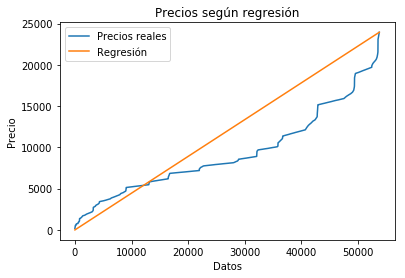

In [53]:
plotReg(data_ytest, "Precios según regresión")

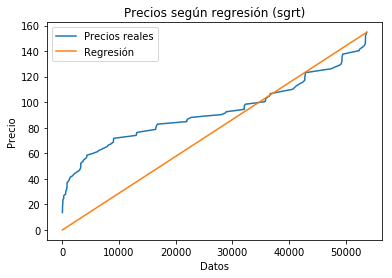

In [54]:
plotReg(np.sqrt(data_ytest), "Precios según regresión (sgrt)")

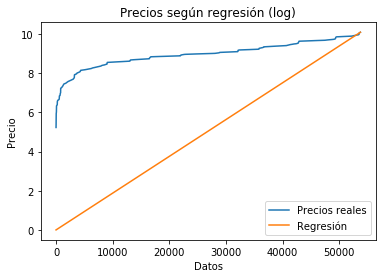

In [55]:
plotReg(np.log(data_ytest), "Precios según regresión (log)")

### 1.h 10-fold sobre la potencia

> Probaremos la utilidad real de realizar una transformación del target del tipo $P \gets P^{i}$ con $i \in [0,2]$ haciendo 10-_fold_ variando el valor de $i$ en a lo menos 10 incrementos. Puede basarse en la estrucuta siguiente. Debe elegir un estimador del error de validación de cada modelo (_e.g._ mediana, promedio...) y comentar brevemente por qué eligio tal estimador. 
Luego grafique como varia el error de validación en función de _i_. 
Finalmente, con el mejor valor de $i$ encontrado, entrene un regresor lineal con todos los datos de entrenamiento y compare su densempeño con los modelos anteriores.
Puede afirmar que alguna de las transformaciones mejore el desempeño del modelo? 

In [56]:
folds = KFold(10)

In [57]:
def getScores():
    score_mean = []
    score_median = []
    score_max = []
    score_min = []
    mean_r2 = []
    mean_mse = []
    for i in range(1,21):
        scores=[]
        scores_r2=[]
        scores_mse=[]
        cont=0
        for train_index, val_index in folds.split(x_tra):
            y_i = data_ytrain.values**(i/10)
            y_train = y_i[train_index]
            y_val = y_i[val_index]
            X_train = x_tra[train_index]
            X_val = x_tra[val_index]
            reg_scaler.fit(X_train, y_train)
            score = reg_scaler.score(X_val, y_val)
            y_pred = reg_scaler.predict(X_val)
            scores_mse.append(mean_squared_error(y_val, y_pred))
            scores_r2.append(r2_score(y_val, y_pred))
            scores.append(score)
            cont+=1
            sys.stdout.write('\r'+'Procesando KFold #'+str(cont)+' (i='+str(i)+')                              ')
            sys.stdout.flush()
        mean_mse.append(np.mean(scores_mse))
        mean_r2.append(np.mean(scores_r2))
        score_mean.append(np.mean(scores))
        score_median.append(np.median(scores))
        score_max.append(np.max(scores))
        score_min.append(np.min(scores))
    return score_mean, score_median, score_max, score_min, mean_mse, mean_r2

In [58]:
score_mean, score_median, score_max, score_min, mean_mse, mean_r2 = getScores()

Procesando KFold #10 (i=20)                              

In [59]:
def plotKFold(media, mediana, maximo, minimo, mean_r2):
    x = np.arange(0,len(media),1)
    plt.figure(figsize=(20, 10))
    plt.plot(x,media, label='Media')
    plt.plot(x,mean_r2, label='R2 (media)')
    plt.plot(x,mediana, label='Mediana')
    plt.plot(x,maximo, label='Máximo')
    plt.plot(x,minimo, label='Mínimo')
    plt.legend()
    plt.title("CrossValidation")
    plt.show()

In [60]:
def plotMSE(mean_mse):
    x = np.arange(0,len(mean_mse),1)
    plt.figure(figsize=(20, 10))
    plt.plot(x,mean_mse, label='MSE (Media)')
    plt.legend()
    plt.title("CrossValidation MSE")
    plt.show()

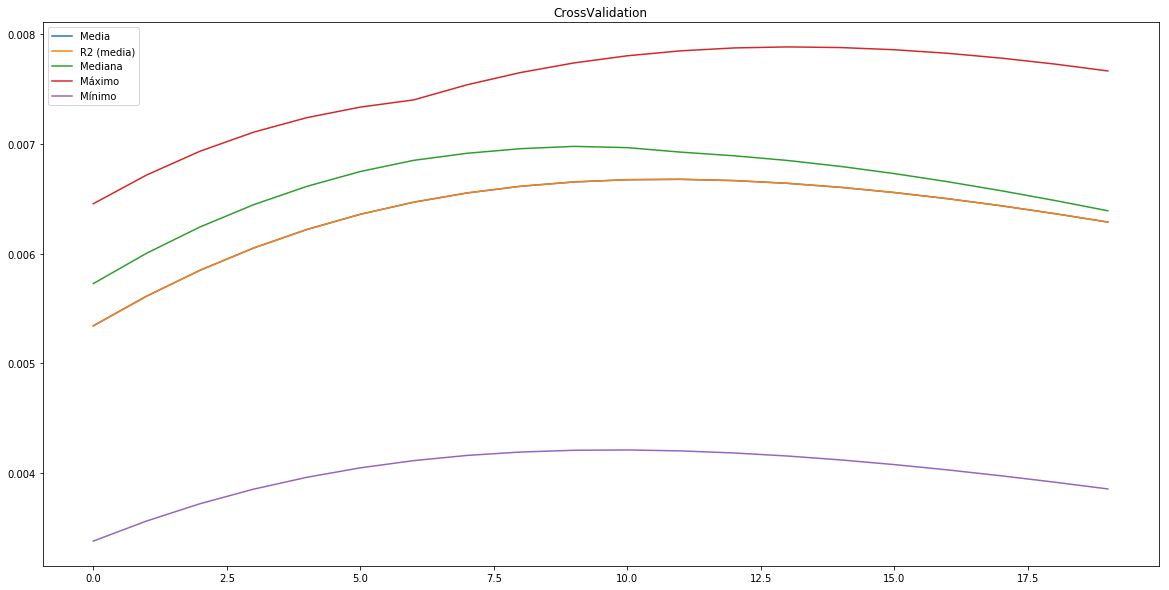

In [61]:
plotKFold(score_mean, score_median, score_max, score_min, mean_r2)

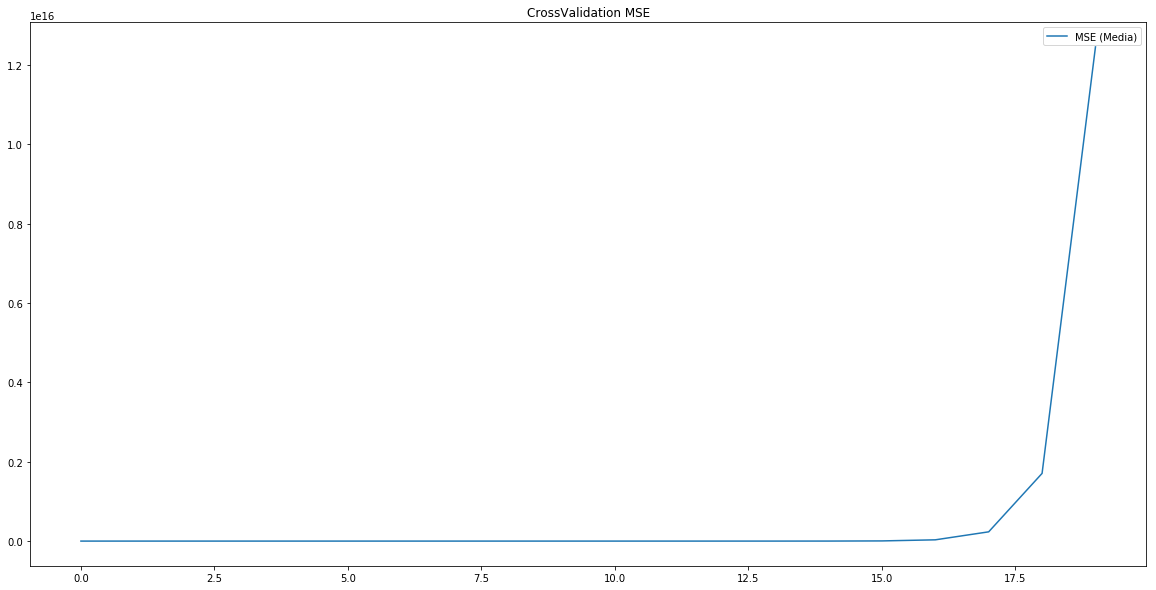

In [62]:
plotMSE(mean_mse)

In [63]:
i_median=score_median.index(max(score_median))+1 #maximo media en i
i_mean=score_mean.index(max(score_mean))+1 #maximo mean en i
print(i_median)
print(i_mean)

10
12


In [64]:
i=i_mean
y_train = data_ytrain.values**(i/10)
y_val = data_yval.values**(i/10)
reg_scaler.fit(x_tra, y_train)
reg_scaler.score(x_val, y_val)

0.0065590090442669835

In [65]:
y_pred = reg_scaler.predict(x_val)**(10/i)

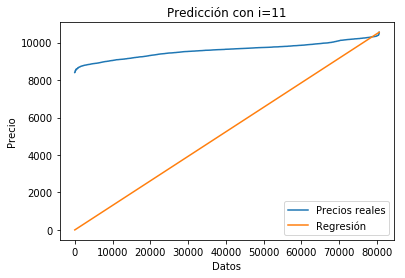

In [66]:
plotReg(y_pred, "Predicción con i=11") 

Se ordena los valores del target y se grafican nuevamente (grafico Y desordenados).

Text(0.5, 1.0, 'Comparación real ordenados')

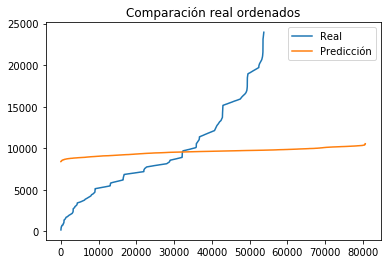

In [67]:
dy_ordered=np.sort(data_ytest)
dp_ordered=np.sort(y_pred)
plt.plot(dy_ordered, label="Real")
plt.plot(dp_ordered, label = "Predicción")
plt.legend()
plt.title("Comparación real ordenados")


### 1.i _Q-Q plot

> Gráfique el _Quantile-Quantile Plot_ del residuo (error) de validación del merjo modelo que haya encontrado. Qué puede decir respecto al supuesto de normalidad de los residuos en los datos? 

In [68]:
# puede necesitar hacer err.reshape((1,)) si obtiene errror "ValueError: all the input array dimensions except for the concatenation axis must match exactly"

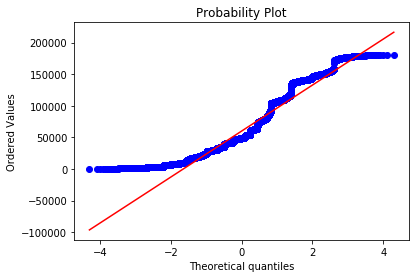

In [69]:
err=r2_score(y_val, y_pred)

y_err = y_val-err

res = stats.probplot(y_err, dist='norm', plot=plt)

### 1.j Variables categóricas

> Entrene ahora el modelo que mejor resultado obtuvo pero esta vez utilizando todos los atributos, transformando las variables categoricas no binarias. Como las variables categóricas no se relacionan linealmente al _target_ (pues no representan un valor numérico), debe transformarlas a variables binarias de igual manera que se realizó con la variable "Occupation" en la parte 1.c. 
Debe cargar de nuevo el DataFrame original pues borramos las columnas de categoría de producto.
Discuta por qué podría resultar útil agregar de esta misma manera el dato "City_Category" y no como se hizo inicialmente. 
Discuta los resultados obtenidos en comparación con la parte anterior.

In [99]:
data_1j=data_ant
#se elimina User_ID porque no entrega información de categorías, y
#Product_Category_2 y Product_Category_3 porque poseen valores nulos
data_1j=data_1j.drop(columns=['User_ID','Product_ID','Product_Category_2', 'Product_Category_3']) 

In [100]:
data_1j.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969


In [101]:
data_d1 = pd.get_dummies(data_1j.Occupation, dtype=np.float64, prefix='oc_')
data_d1_cols = data_d1.columns

data_d2 = pd.get_dummies(data_1j.City_Category, dtype=np.float64, prefix='ci_')
data_d2_cols = data_d2.columns

data_d3 = pd.get_dummies(data_1j.Age, dtype=np.float64, prefix='ag_')
data_d3_cols = data_d3.columns

data_d4 = pd.get_dummies(data_1j.Product_Category_1, dtype=np.float64, prefix='pc_')
data_d4_cols = data_d4.columns

#data_d5 = pd.get_dummies(data_1j.City, dtype=np.float64, prefix='cy_')
#data_d5_cols = data_d5.columns

data_d6 = pd.get_dummies(data_1j.Stay_In_Current_City_Years, dtype=np.float64, prefix='yc_')
data_d6_cols = data_d6.columns

In [102]:
data_1j = data_1j.drop(columns=['Occupation', 'City_Category', 'Age', 'Product_Category_1', 'Stay_In_Current_City_Years', 'Marital_Status', 'Gender'])

In [103]:
data_1j[data_d1_cols]=data_d1
data_1j[data_d2_cols]=data_d2
data_1j[data_d3_cols]=data_d3
data_1j[data_d4_cols]=data_d4
#data_1j[data_d5_cols]=data_d5
data_1j[data_d6_cols]=data_d6

In [104]:
datay=data_1j['Purchase']
dataX=data_1j.drop(columns=['Purchase'])
# Primero se separa el 75% como entrenamiento y queda un 25% disponible en data_temp
data_Xtrain, data_Xtemp, data_ytrain, data_ytemp = train_test_split(dataX, datay, test_size=0.25) 
#sepera el 15% (25%*60%) como validación, y el 10% (25%*40%) con test. 
data_Xval, data_Xtest, data_yval, data_ytest = train_test_split(data_Xtemp,data_ytemp, test_size=0.4) 

In [105]:
data_Xtrain.columns

Index(['oc__0', 'oc__1', 'oc__2', 'oc__3', 'oc__4', 'oc__5', 'oc__6', 'oc__7',
       'oc__8', 'oc__9', 'oc__10', 'oc__11', 'oc__12', 'oc__13', 'oc__14',
       'oc__15', 'oc__16', 'oc__17', 'oc__18', 'oc__19', 'oc__20', 'ci__A',
       'ci__B', 'ci__C', 'ag__0-17', 'ag__18-25', 'ag__26-35', 'ag__36-45',
       'ag__46-50', 'ag__51-55', 'ag__55+', 'pc__1', 'pc__2', 'pc__3', 'pc__4',
       'pc__5', 'pc__6', 'pc__7', 'pc__8', 'pc__9', 'pc__10', 'pc__11',
       'pc__12', 'pc__13', 'pc__14', 'pc__15', 'pc__16', 'pc__17', 'pc__18',
       'yc__0', 'yc__1', 'yc__2', 'yc__3', 'yc__4+'],
      dtype='object')

In [106]:
y_train = data_ytrain.values
y_val = data_yval.values
reg_scaler.fit(data_Xtrain, y_train)
reg_scaler.score(data_Xval, y_val)

0.6294208324635395

In [107]:
y_pred = reg_scaler.predict(data_Xval)

In [108]:
y_pred

array([13339.75,  6534.75, 13383.75, ...,  6771.75,  7281.75, 11366.75])

Error: 0.6294208324635395


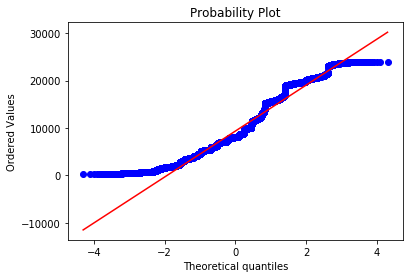

In [109]:
err=r2_score(y_val, y_pred)
print("Error: {}".format(err))

y_err = y_val-err

res = stats.probplot(y_err, dist='norm', plot=plt)